Day 3: SVMs (Support Vector Machines)
🎯 Objective of the day

Understand how SVMs find the best separating boundary.

Train SVMs on Iris with both linear and non-linear kernels.

Compare with Logistic Regression, kNN, and Naive Bayes.

📝 Notes

SVM finds the maximum margin hyperplane → the line that separates classes with the largest margin.

Support vectors are the critical points nearest the boundary.

C parameter:

Low C → wider margin, allows misclassifications (high bias).

High C → stricter fit, fewer misclassifications on training, risk of overfitting (high variance).

Kernel trick: transforms input space to allow non-linear boundaries (e.g., RBF kernel).

2. Linear SVM

Works when the classes can be separated (or almost separated) by a straight line (in 2D) or a flat plane (in higher dimensions).

Objective:

maximize margin while minimizing misclassifications.
maximize margin while minimizing misclassifications.

If perfect separation is not possible, a parameter 𝐶 controls the trade-off:

Large C: fewer misclassifications, tighter margin (risk of overfitting).

Small C: allows more errors, wider margin (better generalization).

👉 Linear SVM = finds the straight line/plane that best separates classes with the widest margin.

3. RBF SVM (nonlinear kernel)

What if the data is not linearly separable? (e.g., concentric circles).

SVMs use the kernel trick: map the data into a higher-dimensional space where a linear boundary can exist.

RBF kernel (Radial Basis Function) is the most popular:

𝐾(𝑥,𝑥′)=exp(−𝛾∥𝑥−𝑥′∥2)

Intuition: RBF creates a flexible, curved boundary by considering local similarity between points.

Two key parameters:

C: same as linear SVM, controls margin vs. errors.

γ: controls how far the influence of a single training point reaches.

Low γ: smoother, simpler boundary.

High γ: very wiggly, can overfit.

👉 RBF SVM = allows complex, curved boundaries by projecting data into infinite-dimensional space using similarity functions.

Linear SVM Accuracy: 0.8
RBF SVM Accuracy: 0.8


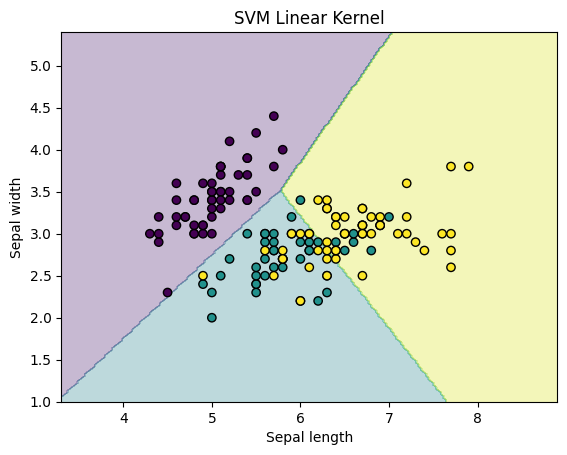

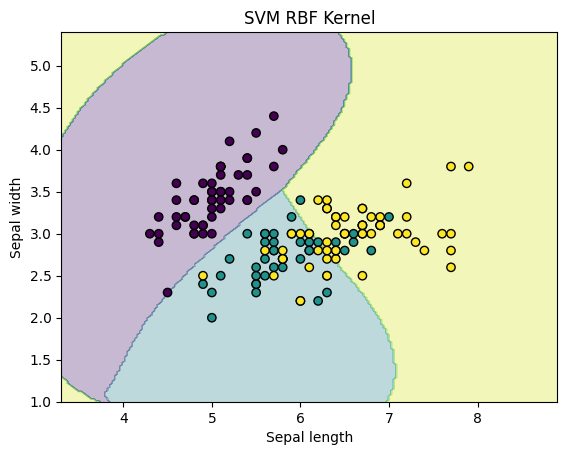

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data[:, :2]   # only sepal length & width for visualization
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train Linear SVM

svm_linear = SVC(kernel="linear", C=1.0)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred))

#Train RBF SVM (non-linear)

svm_rbf = SVC(kernel="rbf", C=1.0, gamma=0.7)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

# Visualize decision boundaries

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="viridis")
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, X, y, "SVM Linear Kernel")
plot_decision_boundary(svm_rbf, X, y, "SVM RBF Kernel")



📊 Exercise of the Day

What accuracies did you get with linear kernel and RBF kernel?

Compare the decision boundary of SVM (linear & RBF) with Logistic Regression (straight) and Naive Bayes (smooth curves).

In your own words: what does the C parameter control in SVM?

1) 
-Linear: 0.8
-RBF: 0.8

2) 
The linear SVM looks very similar to logistic regression as it is composed on only straight lines.

The RBF consists of smooth curves but its not like Naive Bayes as the boundaries look more irregular and not continuos.

3) 
It controls the trade-off. If the data sets can't perfectly cut off then the C value adjusts the marging of classification.

🌟 Mini-Challenge

Try different values of C (0.1, 1, 10, 100) with the linear kernel.

Plot accuracy vs C.
👉 What happens as C increases? Why?

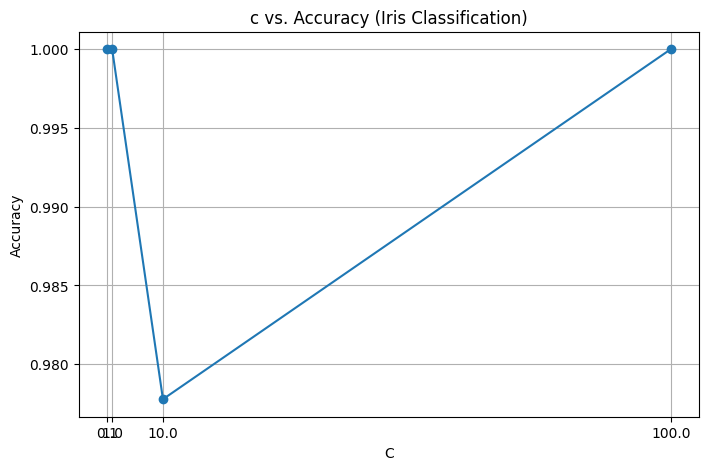

In [ ]:
iris = load_iris()
X = iris.data[:, :2]   # sepal length & width (2D for plotting)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# k vs. accuracy
c_values = [0.1, 1, 10, 100]
accuracies = []

for c in c_values:
    svm = SVC(kernel="linear", C=c)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(c_values, accuracies, marker="o")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("c vs. Accuracy (Iris Classification)")
plt.xticks(c_values)
plt.grid(True)
plt.show()

Accuracy drops slightly and stays constant. This happens because the data set is fairly easy, so even a simple linear boundary already classifies it decently.